### Probelm Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Field or attribute details:
We have other fields as follows:

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.

capital-gain: continuous.
capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')  # Supressing the warnings

### Loading the Dataset

In [3]:
df=pd.read_csv('census_income.csv') # loading the dataset and storing it into dataframe named df

In [4]:
df.shape

(32560, 15)

Dataset contain 32560 rows and 15 Columns

In [5]:
df.size

488400

Dataset has 488400 number of elements

In [6]:
df.ndim
#It returns the number of dimensions dataset have

2

In [7]:
# Printing the first five rows of the dataframe.
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
# Printing the last 5 data points
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
# Lists all the 15 columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Dataset has two types datatypes one is integer and second is object out of which Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week have integer datatype all other columns are of object datatype.

In [11]:
df.get_dtype_counts()

int64     6
object    9
dtype: int64

We can see there are 9 column of object type and 6 are of numerical datatypes.

In [12]:
# Summarizing the dataset in statistic format
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Observing that the deviation between each columns is very large we will need scaling technique to minimize the same.
- Average age of person is 38 and Average working hours is 40 hours per weeek.
- Dataset shows one's maximum age is 90.

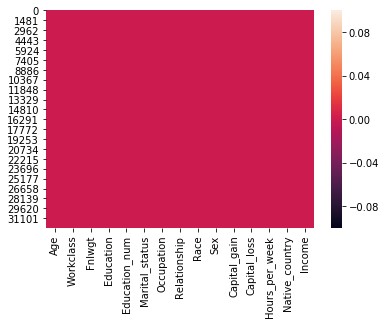

In [13]:
# Checking for any missing valules in dataset
sn.heatmap(df.isnull())

In [14]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Conclusion:The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is empty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [15]:
#Determines the unique values present in each features
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Income and Age columns have only 2 values.

In [16]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Checking for '?'  value in Dataset

In [17]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

We can see that 21789 males and 10771 females.

Chekcing for '?' in dataset

In [18]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [19]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [20]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Workclass column contain 1836 '?' symbol as field name.

In [21]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Occupation column contain 1843-'?' symbol as field name.

In [22]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Native Country Columns contain 583 -'?' symbols.

In [23]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

- Based on above observation only three columns Workclass,Occupation,and Native_country have '?' values which needs to be preprocessed later. 

### Exploratory Data Analysis(EDA)

In [24]:
df.keys()

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [25]:
#Shows all categorical column
df.select_dtypes(['object']).head(2)

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


#### Univariate anaylsis

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

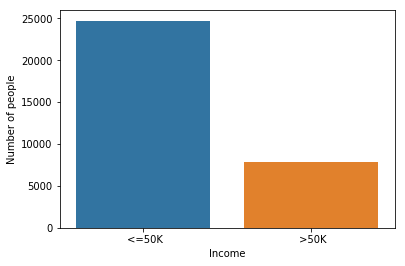

In [26]:
#Target variable analysis
sn.countplot(df['Income'])
plt.ylabel("Number of people")
df['Income'].value_counts()

Number of people having income greater than 50k are 24719 and less than 50k are 7841

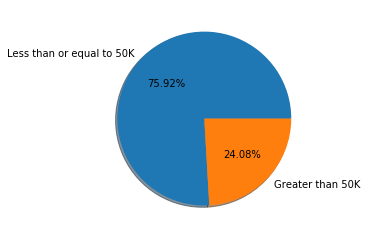

In [27]:
# Pie chart for class variable
labels='Less than or equal to 50K','Greater than 50K '
fig,ax=plt.subplots()
ax.pie(df['Income'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

- The dataset is imbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.We will need to handle it later.

Text(0, 0.5, 'Number of people')

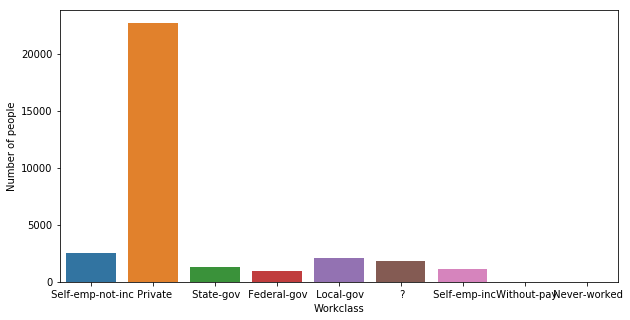

In [28]:
plt.figure(figsize=(10,5))
sn.countplot(df['Workclass'])
plt.ylabel("Number of people")

People working in private shows highest count while other column have very less count.

Text(0, 0.5, 'Number of people')

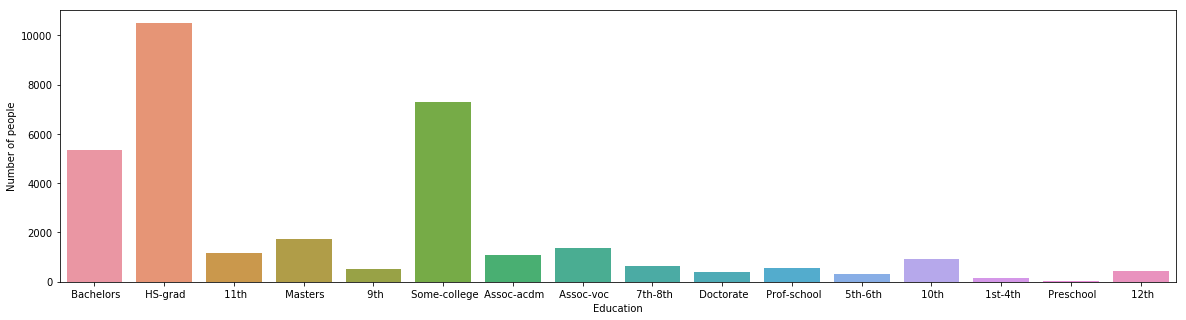

In [29]:
plt.figure(figsize=(20,5))
sn.countplot(df['Education'])
plt.ylabel("Number of people")

Most number of people are HS-grad followed by Some college and Bachelors. 

Text(0, 0.5, 'Number of people')

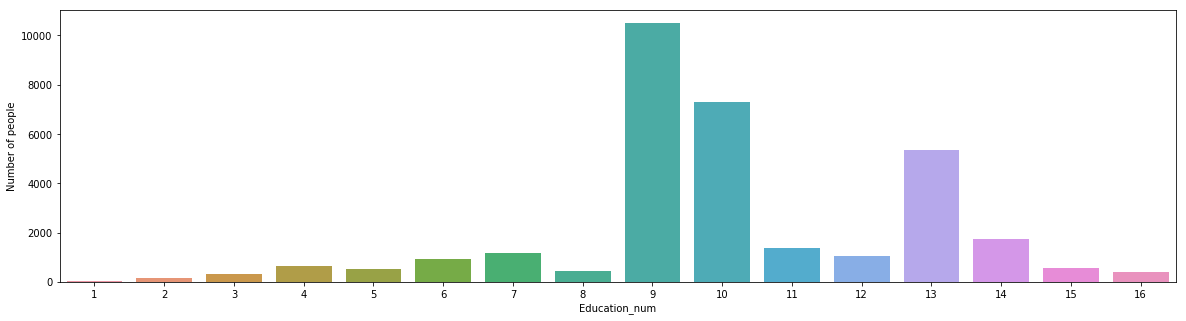

In [30]:
plt.figure(figsize=(20,5))
sn.countplot(df['Education_num'])
plt.ylabel("Number of people")

The matching education level of the education number:

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,
10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

Since Education and Education_num column represent the data one in numerical and other in categorical format we will need to drop one column later. 

Text(0, 0.5, 'Number of people')

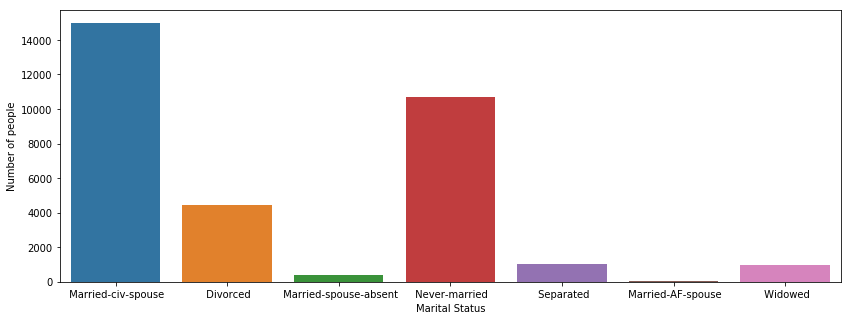

In [31]:
plt.figure(figsize=(14,5))
sn.countplot(df['Marital_status'])
plt.xlabel("Marital Status")
plt.ylabel("Number of people")

Large number of people are having status as 'Married-civ-spouse' ,'Never married' and 'Divorced'.Very less number of people are widowed,seperated,married spouse absent and married af spouse.

Text(0.5, 0, 'Number of people')

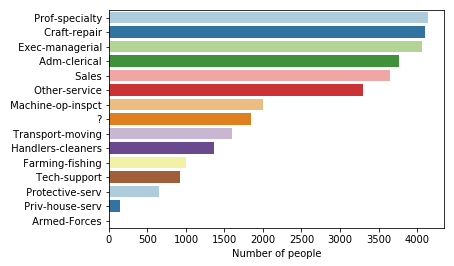

In [32]:
ocu = df['Occupation'].value_counts()
sn.barplot(ocu.values, ocu.index, palette='Paired')
plt.xlabel("Number of people")

Very less number of people are into armed forces,private house service and highest in craft repair,professional speciality and many more.

In [33]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

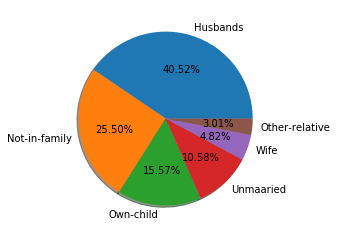

In [34]:
labels=['Husbands','Not-in-family','Own-child','Unmaaried','Wife','Other-relative']
fig,ax=plt.subplots()
ax.pie(df['Relationship'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can observed that the most i.e 40.52 percent of persons are having husbands.

Text(0, 0.5, 'Number of people')

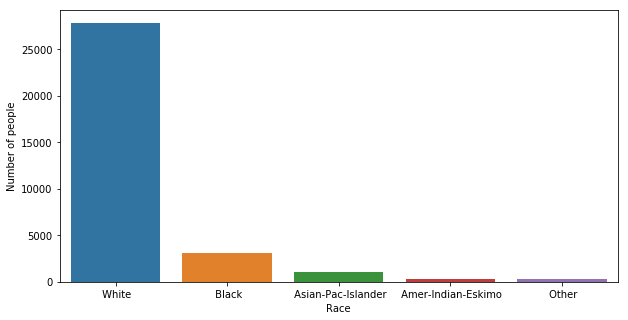

In [35]:
plt.figure(figsize=(10,5))
sn.countplot(df['Race'])
plt.xlabel("Race")
plt.ylabel("Number of people")

Most of the people in dataset have white as their Race and least have Amer-Indian-Eskimo as their race.

In [36]:
df['Capital_gain'].isnull().sum()

0

Text(0, 0.5, 'Number of people')

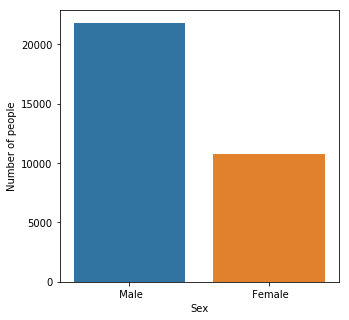

In [37]:
plt.figure(figsize=(5,5))
sn.countplot(df['Sex'])
plt.xlabel("Sex")
plt.ylabel("Number of people")

There are more number of male than female in dataset.

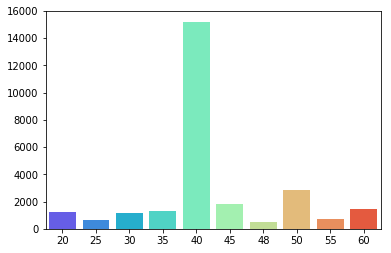

In [38]:
hours = df['Hours_per_week'].value_counts().head(10)
sn.barplot(hours.index, hours.values, palette='rainbow')

We can find that the highest people average working hours per week is 40 hrs.

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

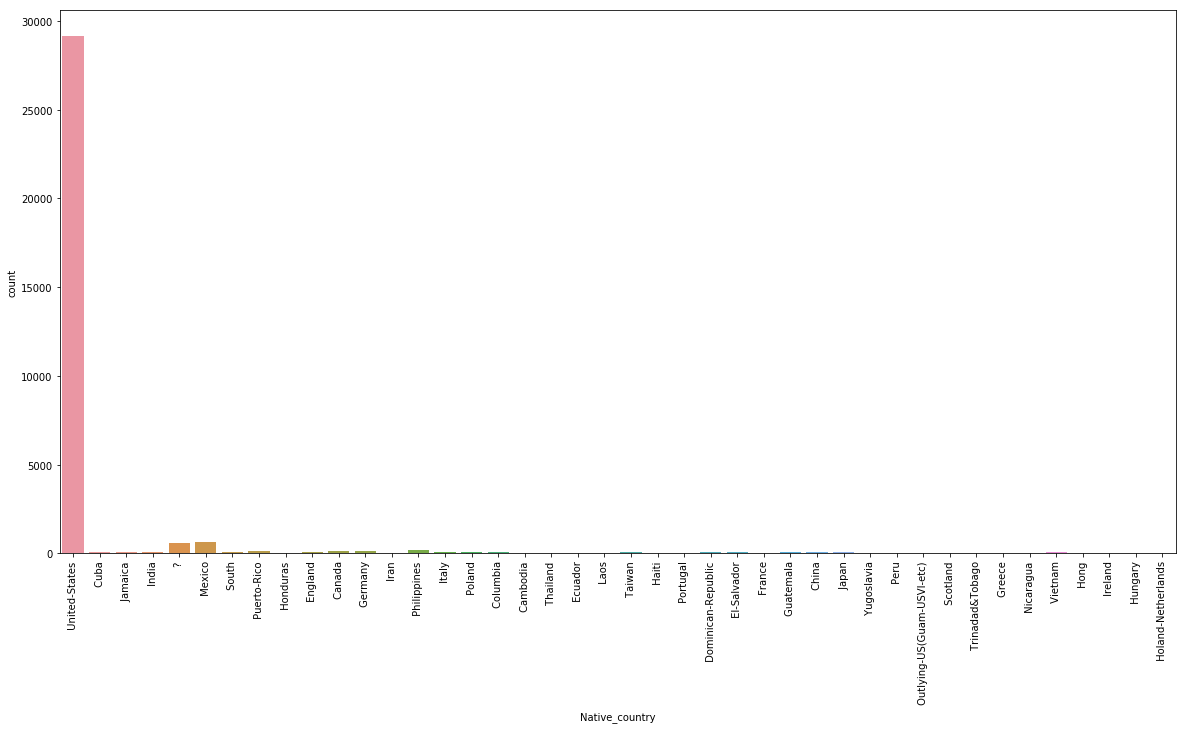

In [39]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sn.countplot(df['Native_country'])
df['Native_country'].value_counts()
#df['Native_country'].value_counts().sum()

In [40]:
df.keys()

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Out of 32560 peoples 29169 that is 89.58 percentage of people are from United States(USA).

In [41]:
#Shows all numerical column
numerical=df.select_dtypes(['int64'])

In [42]:
#Shows all categorical column
categorical=df.select_dtypes(['object'])

In [43]:
numerical.head(2)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40


In [44]:
#Plotting Distribution plot for all columns

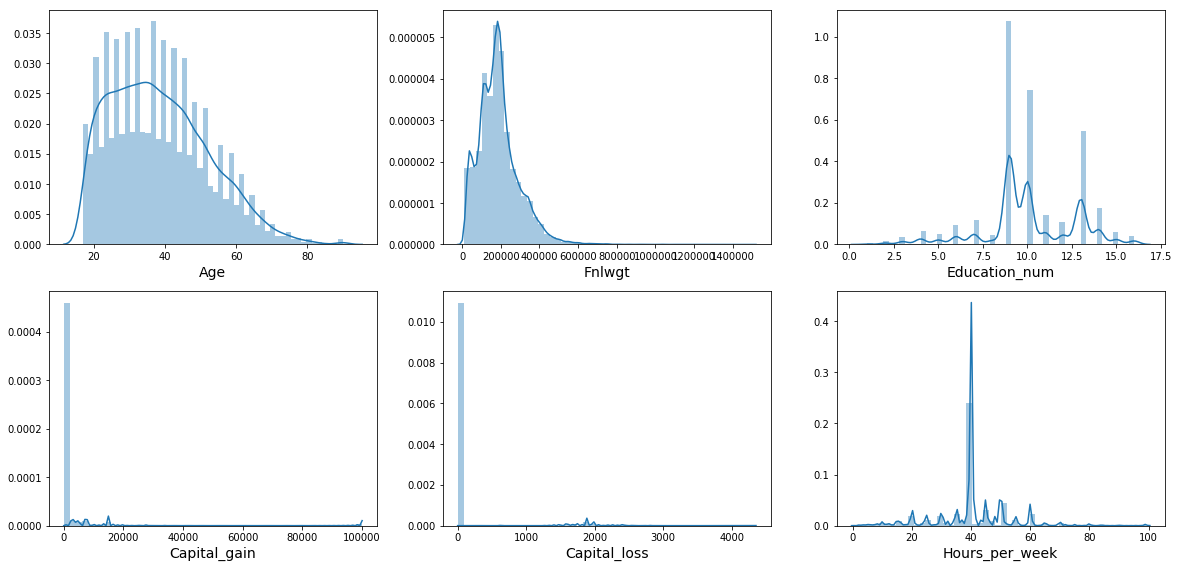

In [45]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(5,3,plotnumber)
        sn.distplot(numerical[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

Inferences: None of the column are normally distributed at all except the age columns which shows less skewed distribution.
-  Fnlwgt,Captial_gain,Capital_loss are right skewd from normal distribution.
- Hours_per_week and Education_num are shows density at center.
- The above plot shows there are outliers present in the dataset.

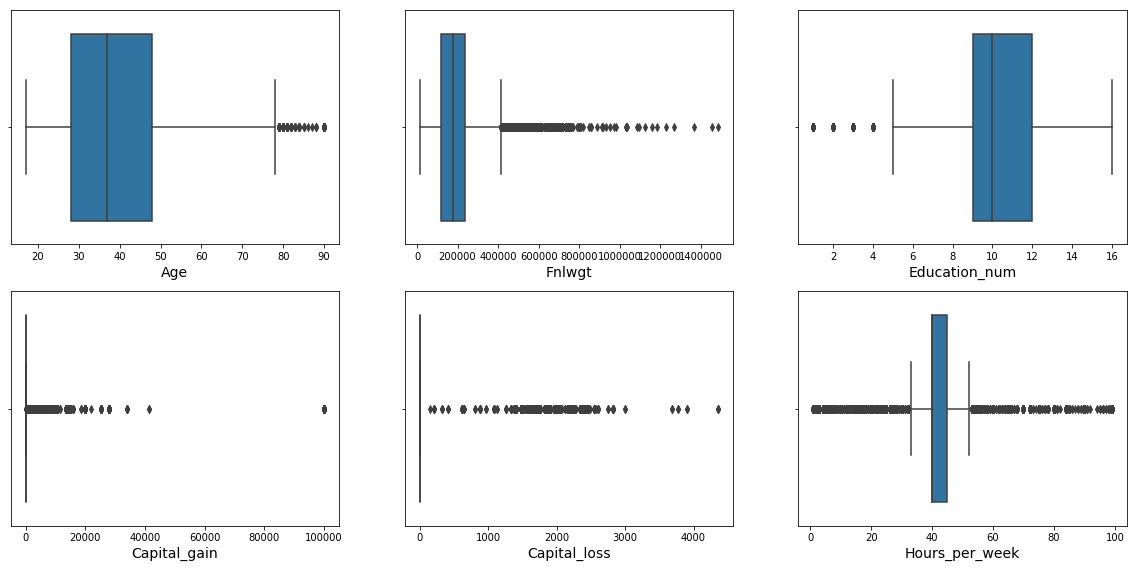

In [46]:
#Plotting Box plot for all columns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(5,3,plotnumber)
        sn.boxplot(numerical[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

Outlier are present in all columns which we will be need to remove later.

### Bivariate Analysis

In [47]:
#Plotting relationship of all columns with target variable

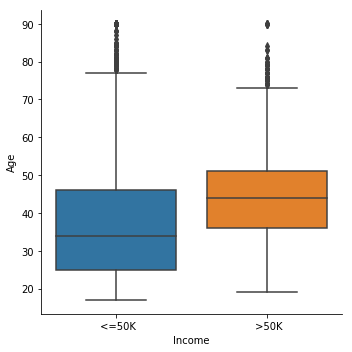

In [48]:
sn.factorplot(data=df,x='Income',y='Age',kind='box',ci=None)

Here People having age greater than 50 are having income absolutely above 50k.

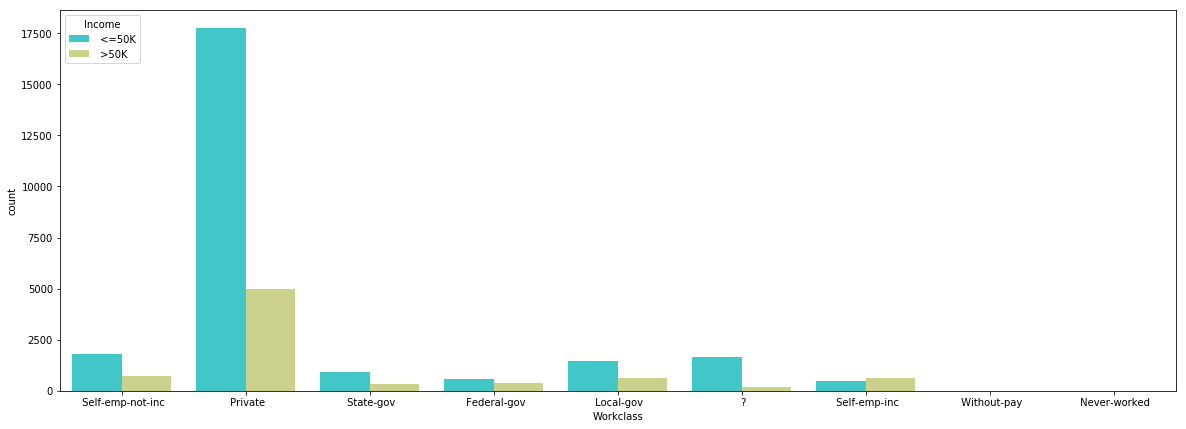

In [49]:
plt.figure(figsize=(20, 7))
sn.countplot('Workclass', hue=df['Income'], data=df,palette='rainbow')

The graph shows the distribution of income in each Workclass where highest count of Private workclass have more number of people having income <=50k.

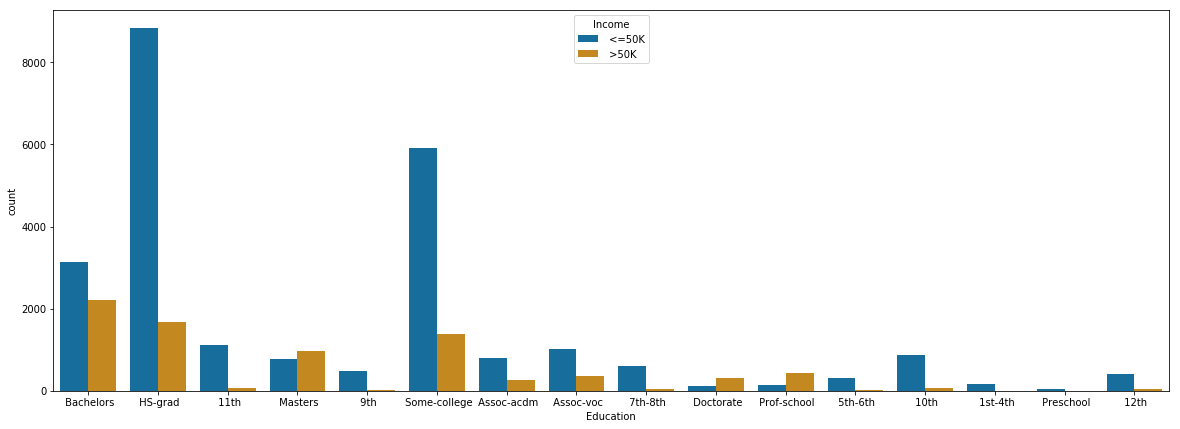

In [50]:
plt.figure(figsize=(20, 7))
sn.countplot('Education', hue=df['Income'], data=df,palette='colorblind')

The above graph shows distribution of education with income, where highest count of HS-grad have which have more number prople having income <=50k.

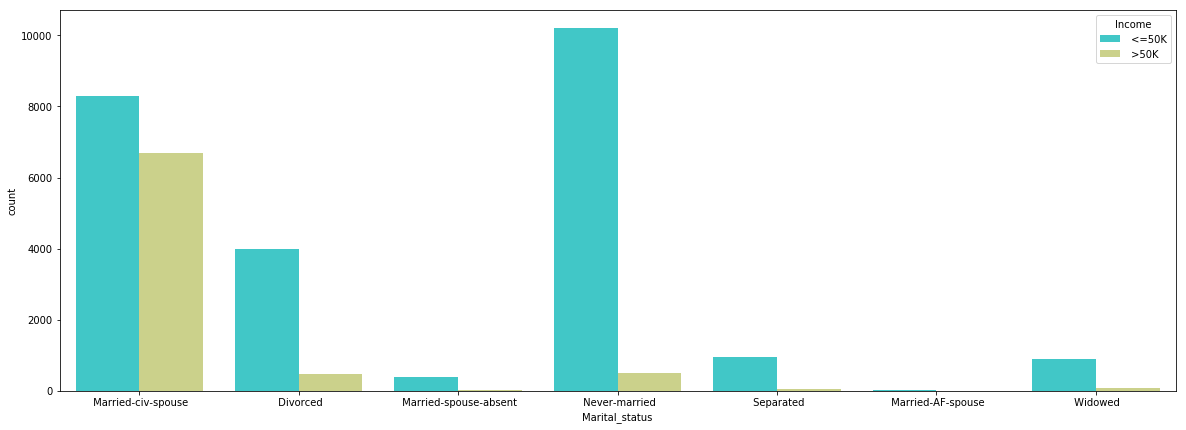

In [51]:
plt.figure(figsize=(20, 7))
sn.countplot('Marital_status', hue=df['Income'], data=df,palette='rainbow')

People belonging to category of never married have almost all number of people income less than or equal to 50k. 

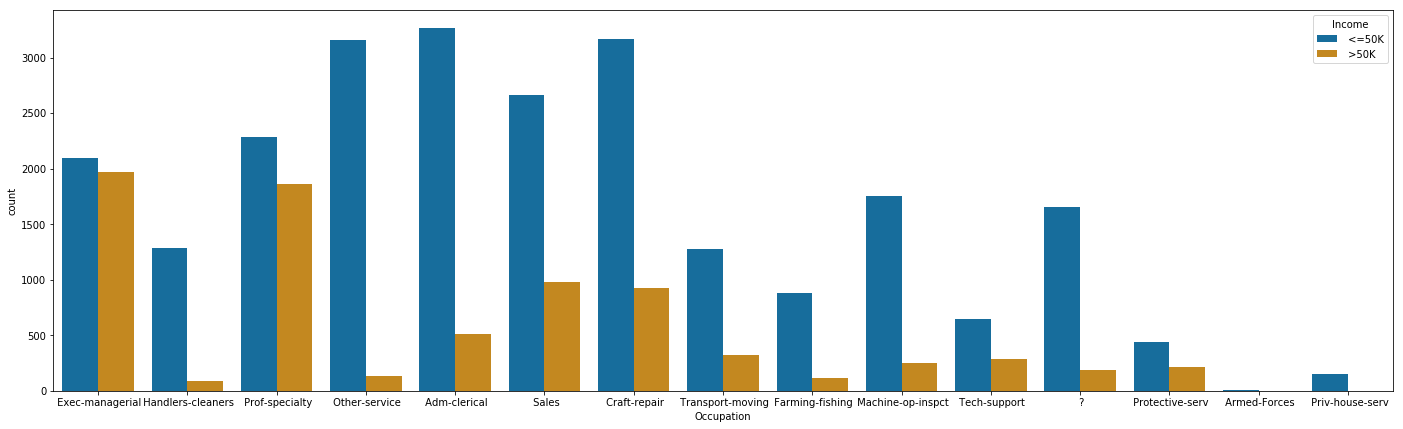

In [52]:
plt.figure(figsize=(24, 7))
sn.countplot('Occupation', hue=df['Income'], data=df,palette='colorblind')

The above graph shows distribution of income with occupation field where, people having Adm-clerical as thier occupation have greater number of people havin income less than or equal to 50k.

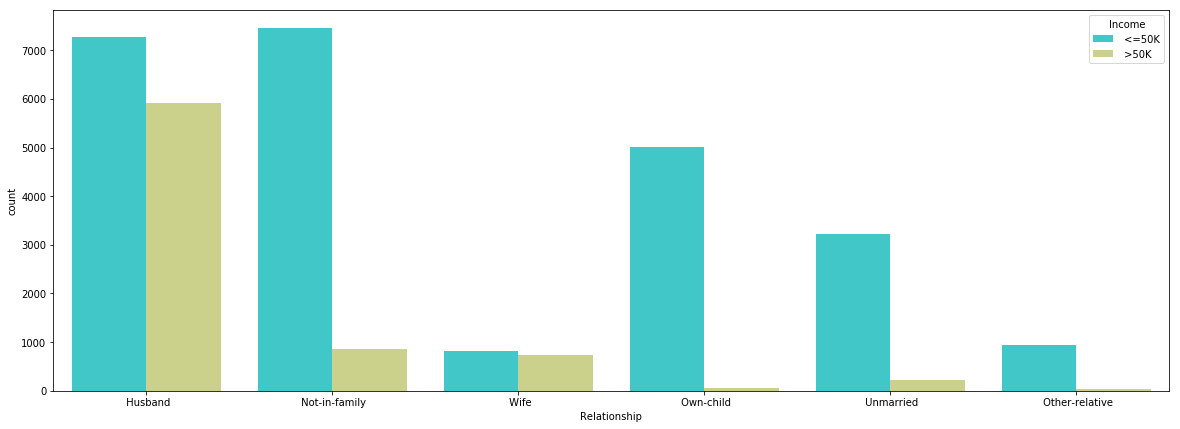

In [53]:
plt.figure(figsize=(20, 7))
sn.countplot('Relationship', hue=df['Income'], data=df,palette='rainbow')

Husband and Not in family relationship people have most number of people have income less than or equal to 50k.

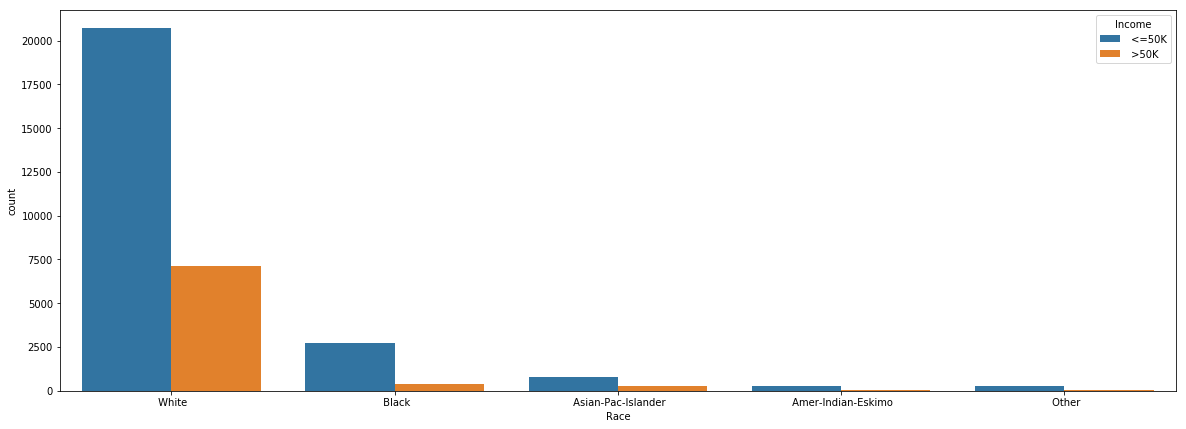

In [54]:
plt.figure(figsize=(20, 7))
sn.countplot('Race', hue=df['Income'], data=df)

Graph shows the contribution of income from each race field where In category White,number of people having income <=50k is more than double than the people having income >50k.

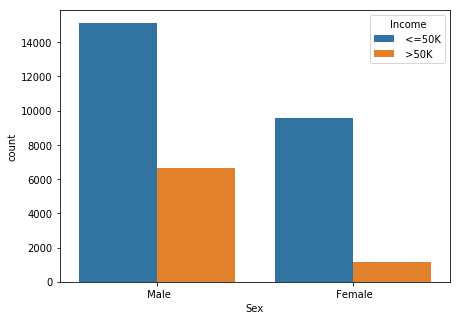

In [55]:
plt.figure(figsize=(7,5))
sn.countplot(df['Sex'],hue=df['Income'])

There are more number of male than female ,whereas count of people having income <=50k are double than the people having income grater than 50k. 

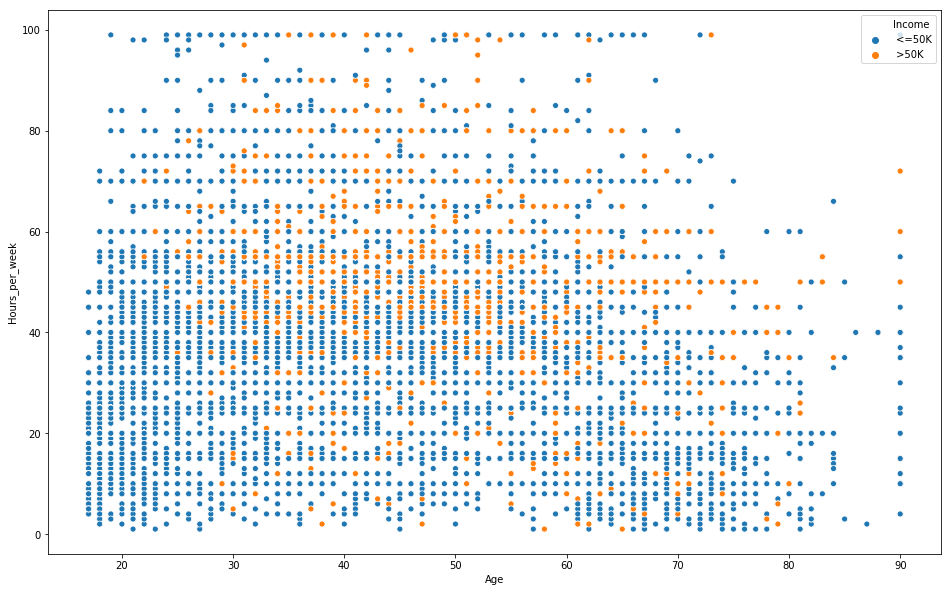

In [56]:
#Plotting relationship between Age and Hours Per Week
plt.figure(figsize=(16,10))
sn.scatterplot(df['Age'],df['Hours_per_week'],hue=df['Income'])

The above plot between age and hours_per_week shows that they are not forming linear correlation with each other all points are scattered on plot.
Large density of people are observed between 20 to 40 age.

Text(0, 0.5, 'Average Age')

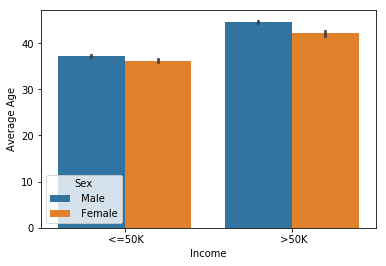

In [57]:
ax = sn.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')
plt.ylabel("Average Age")

People with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

### Multivariate analysis

In [58]:
#Applying label encoding to target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

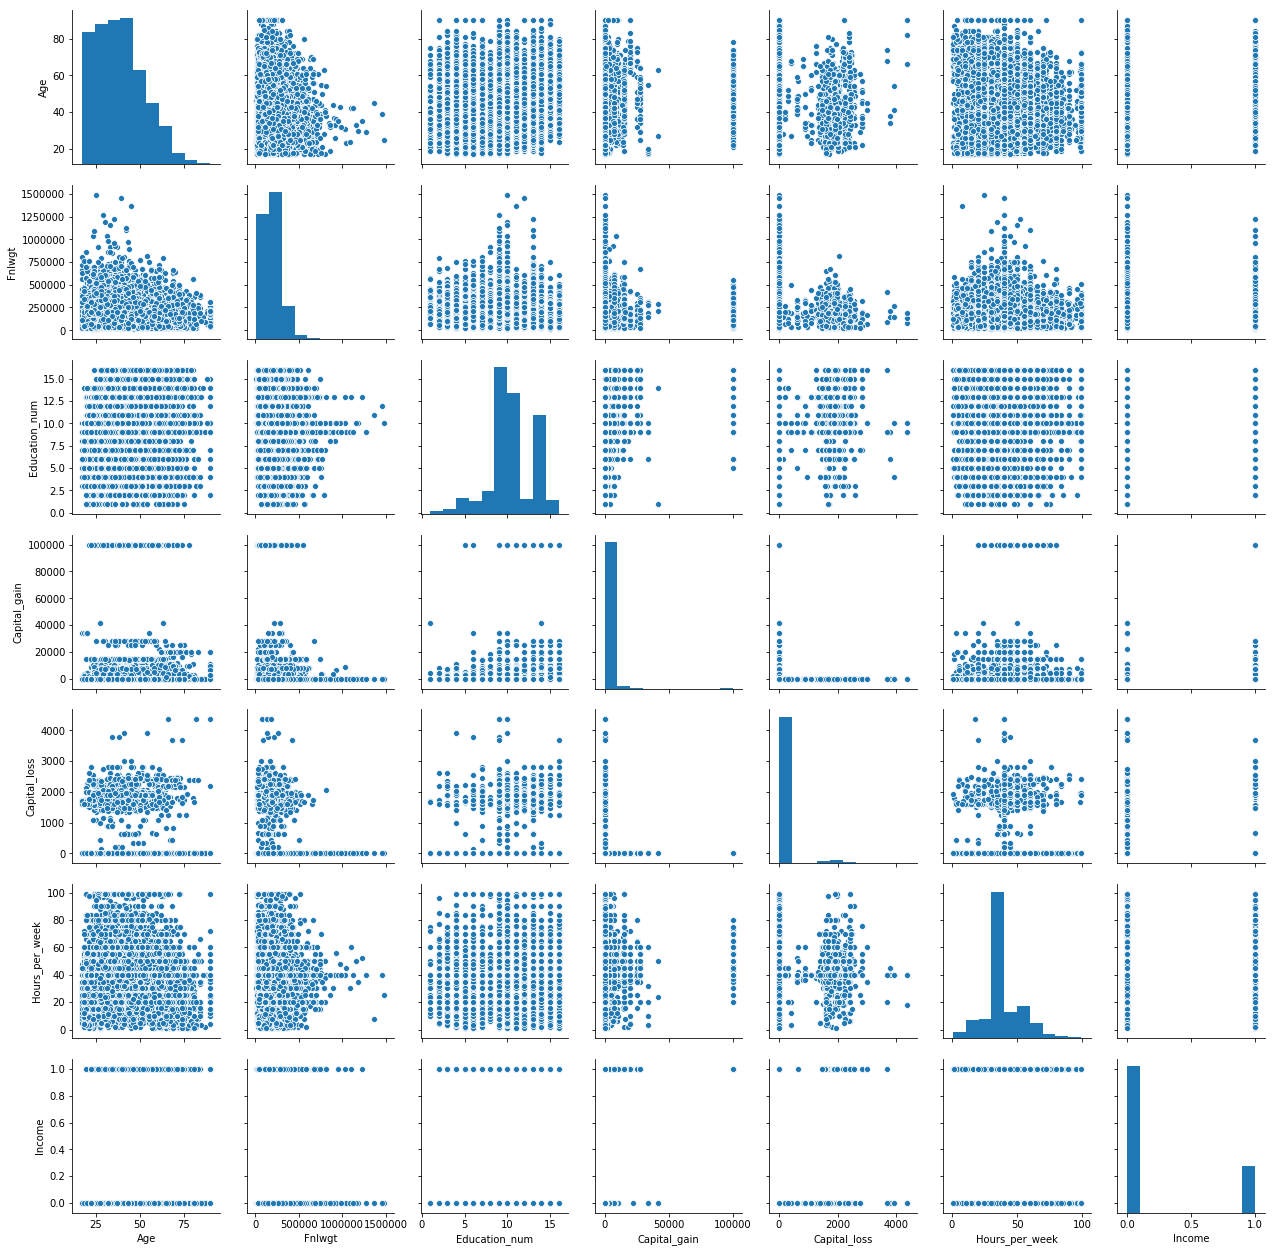

In [59]:
sn.pairplot(df)

Fields Such as :
'Age','Education_num', 
'Capital_gain','Capital_loss',
'Hours_per_week' shows some what showing neutral correlation with each other.


In [60]:
# finding correlation coefficient
cor=df.corr()

In [61]:
cor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


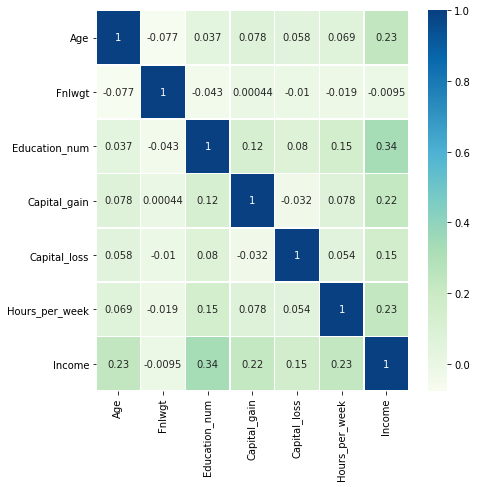

In [62]:
# Plotting heatmap
fig, axis = plt.subplots(figsize=(7, 7))
sn.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

- From the correlation heatmap, we can see that the target feature 'Income' is highly correlated with Age, numbers of years of education, capital gain and number of hours per week.
- There is only 1 field which is negative relationship with all the other  fields : 'fnlwgt',it can be removed to increase accuracy of model.

### Data Clenaing

#### Handling '?' value in dataset

In [63]:
df.isin([' ?']).sum().sum()

4262

Shows total number of '?' value in whole dataset are 4262.

In [64]:
#Replacing with null value
df=df.replace(' ?', np.nan)

In [65]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [66]:
column_nan = ['Workclass', 'Occupation', 'Native_country']

#### Replacing the missing values in column_nan with highest frequency count of categories in each class using mode method.

In [67]:
for col in column_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [68]:
categorical.dtypes

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [69]:
df.isnull().sum().sum()

0

Finally there are no missing values nor nan nor ' ?' in dataset.

### Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [72]:
#Dropping the unencessary columns
df.drop(['Education'],axis=1,inplace=True) #Beacuse education_num represent the same data in numerical format

In [73]:
#Dropping Fnlwgt beacuse it shows negative correlation with all column as well as target variabel
df.drop(['Fnlwgt'],axis=1,inplace=True)

In [74]:
# Now all features are in numerical format 
df.head(2)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0


### Removing the Outliers

In [75]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3.57).all(axis=1)]

In [76]:
df.shape

(32560, 13)

In [77]:
new_df.shape

(29579, 13)

In [78]:
new_df.shape[0]

29579

In [79]:
# Data loss percentage
# With using z<3 we are lossing nearly 15 percent of data which is feasible.
Data_loss=(new_df.shape[0]-df.shape[0])/df.shape[0]*100
Data_loss

-9.155405405405405

After removing the outliers from the data the shape of the data has change from 29579,13 to 29579,13 which shows that with the z score value less than 3.57 we are able to remove various rows with lossing less than 10 percent of data , Hence our new data shape is (29579,13).

In [80]:
# Dropping the Capital loss column because it is giving least correlation of 0.15 after fnlwgt 

In [81]:
new_df.drop(['Capital_loss'],axis=1,inplace=True)

In [82]:
df_acc=new_df.copy()

In [83]:
#df_acc.to_csv('census_collab.csv')

### Splitting dataset into input features and target variables 

In [84]:
from sklearn.model_selection import train_test_split
x = new_df.drop(['Income'], axis = 1)
y=new_df["Income"]

In [85]:
print(x.shape)
x.head()

(29579, 11)


,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,50,5,13,2,3,0,4,1,0,13,38
1,38,3,9,0,5,1,4,1,0,40,38
2,53,3,7,2,5,0,2,1,0,40,38
4,37,3,14,2,3,5,4,0,0,40,38
5,49,3,5,3,7,1,2,0,0,16,22


In [86]:
print(y.shape)
y.head()

(29579,)


0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int64

### Handling Class Imbalanced problem by oversampling the minority class

In [87]:
from imblearn.over_sampling import SMOTE
SM =SMOTE()
x_over, y_over = SM.fit_resample(x, y)

In [88]:
y_over.value_counts()

1    22935
0    22935
Name: Income, dtype: int64

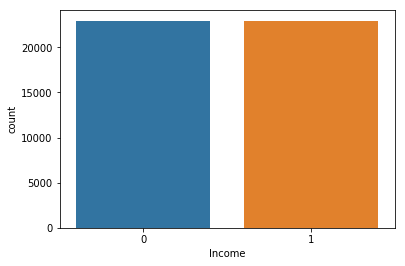

In [89]:
sn.countplot(y_over)

Now the Income class is having same number of '0' and '1'

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Finding the best random state

In [91]:
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.7689848121502798 on random state 28


### Creating a train_test_split

In [92]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=maxRS)

### Performing Standars Scaler method

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Accuracy score using logistic regression model is 77.39989826320762
Cross validation score 81.82157074215117
-----------------------------
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      6951
           1       0.76      0.79      0.78      6810

    accuracy                           0.77     13761
   macro avg       0.77      0.77      0.77     13761
weighted avg       0.77      0.77      0.77     13761

-----------------------------

 Confusion Matrix


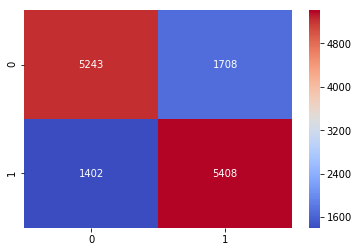

In [94]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")


Accuracy of Decision Tree classification is  85.38623646537316
Cross validation score 80.71266939748763
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6951
           1       0.84      0.87      0.85      6810

    accuracy                           0.85     13761
   macro avg       0.85      0.85      0.85     13761
weighted avg       0.85      0.85      0.85     13761


 Confusion Matrix


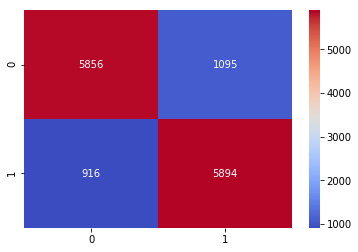

In [95]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
CV3=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",CV3*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using GuassianNB classifier model is 78.72247656420318
Cross validation score 82.63972367155391
-------------------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      6951
           1       0.81      0.74      0.78      6810

    accuracy                           0.79     13761
   macro avg       0.79      0.79      0.79     13761
weighted avg       0.79      0.79      0.79     13761

-------------------------------

 Confusion Matrix


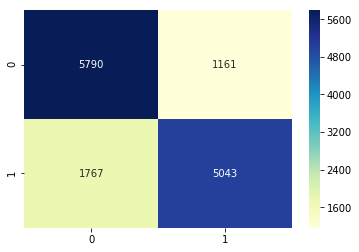

In [96]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
pred=NB.predict(x_test)
gnb_acc=accuracy_score(y_test,pred)
print('Accuracy score using GuassianNB classifier model is',gnb_acc*100)
gnb_cv=cross_val_score(NB,x,y,cv=5).mean()
print("Cross validation score",gnb_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Random Forest Classificarion is  88.28573504832498
Cross validation score 84.5938112441467
-------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6951
           1       0.86      0.90      0.88      6810

    accuracy                           0.88     13761
   macro avg       0.88      0.88      0.88     13761
weighted avg       0.88      0.88      0.88     13761

-------------------------------

 Confusion Matrix


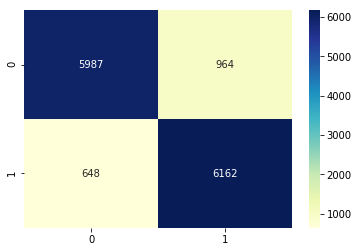

In [97]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [98]:
#Storing the result in pandas dataframe

model=['Logistic Regression','Decision Tree Classifier','GuassianNB Classifier','Random Forest Classifier']

acc=[lr_acc*100,dtc_acc*100,gnb_acc*100,rfc_acc*100]

cv_score=[lr_cv*100,CV3*100,gnb_cv*100,rfc_cv*100]

diff=[cv_score[0]-acc[0],acc[1]-cv_score[1],cv_score[2]-acc[2],acc[3]-cv_score[3]]
diff
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'Cross Validation_score':cv_score,'Difference':diff})
result

,Model,Accuracy_score,Cross Validation_score,Difference
0,Logistic Regression,77.399898,81.821571,4.421672
1,Decision Tree Classifier,85.386236,80.712669,4.673567
2,GuassianNB Classifier,78.722477,82.639724,3.917247
3,Random Forest Classifier,88.285735,84.593811,3.691924


### Choosing a Model

I am going to choose Random Forest Classifier as my best model because it is giving highest accuracy of nearly 88 percent and showing least cross validation difference.

### Applying hyperparameter tuning to best accuracy model

In [654]:
parameters= {
    'n_estimators': [142,340],
    'max_depth': [30,40],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini', 'entropy'],
    }

In [655]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [656]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [142, 340]})

In [657]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'n_estimators': 142}

Accuracy of the model using Random Forest classifier is  88.46740789186832
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      6951
           1       0.86      0.91      0.89      6810

    accuracy                           0.88     13761
   macro avg       0.89      0.88      0.88     13761
weighted avg       0.89      0.88      0.88     13761

-------------------------------

 Confusion Matrix


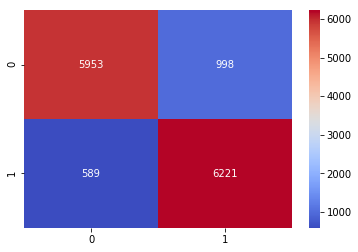

In [99]:
Final_model=RandomForestClassifier(n_estimators=142,criterion='gini',max_features='log2',max_depth=30,random_state=23)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Random Forest classifier is ",acc_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

### Plotting Roc curve and roc_auc value for predcited probabalities

In [100]:
#Receiver operator charactersitics(ROC)
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [101]:
#False positive rate
fpr

array([0.        , 0.14357646, 1.        ])

In [102]:
# True positive rate
tpr

array([0.        , 0.91350954, 1.        ])

In [103]:
thresholds

array([2, 1, 0], dtype=int64)

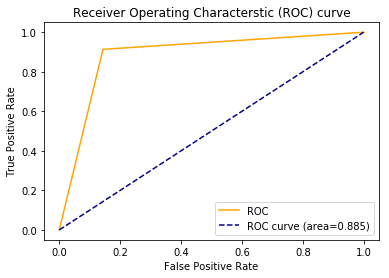

In [104]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

#### Conclusion
- In this project, we build various models like logistic regression, decision tree classifier, random forest classifier and GuassianNB classifier.
- Random forest classifier gave highest accuracy of 88.55 percent and F1 score of 88.

### Saving the Model

In [106]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [107]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']